<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r13_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r13/4-fft-normal-n-0-6-9-15-r13.csv?token=AKVFSOCUJGQPSALZU5GR5JK64IFPY')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r13/4-fft-malicious-n-0-6-9-15-m-1-11-r13.csv?token=AKVFSOG5C4CO6Z34NEADVJ264IFP6')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,110,4,2,1,1,4,3,9,15,15,24,8,6,4,2,0.5,12,4,1,4,4,8,24,3,27,1
1,132,4,2,1,1,4,3,9,15,15,24,8,9,4,2,0.5,12,4,1,4,4,8,36,3,27,0
2,420,3,2,1,1,4,3,9,15,15,21,5,18,4,2,0.5,12,3,2,4,6,6,72,3,27,1
3,442,3,2,1,1,4,3,9,15,15,21,5,27,4,2,0.5,12,3,2,4,6,6,108,3,27,0
4,528,3,2,1,1,4,3,9,15,15,17,1,22,5,2,0.4,12,2,3,4,6,6,88,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82498,3278631,3,2,5,2,2,3,9,15,15,17,1,60213,5,2,0.4,19,5,16,20,80,6,1204260,15,135,0
82499,3278638,3,2,5,3,2,3,9,15,15,17,1,60213,5,2,0.4,26,4,17,20,68,6,1806390,15,135,0
82500,3278645,3,2,5,4,2,3,9,15,15,17,1,60213,5,2,0.4,33,3,18,20,54,6,2408520,15,135,0
82501,3278652,3,2,5,5,3,3,9,15,15,17,1,60213,5,2,0.4,40,2,19,20,38,6,4515975,15,135,0


In [0]:
df.shape

(82503, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r13/4-fft-malicious-n-0-6-9-15-m-1-12-r13.csv?token=AKVFSOF4X4R7BFTB6HZHQIS64IFQG')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r13/4-fft-malicious-n-0-6-9-15-m-1-7-r13.csv?token=AKVFSOG2HBE2OOCRWJ6HH4S64IFQK')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r13/4-fft-malicious-n-0-6-9-15-m-11-12-r13.csv?token=AKVFSOHUO4J3I3YP4UWHOE264IFQQ')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r13/4-fft-malicious-n-0-6-9-15-m-7-11-r13.csv?token=AKVFSOEFJIGQF2P3577ZJYS64IFQW')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r13/4-fft-malicious-n-0-6-9-15-m-7-12-r13.csv?token=AKVFSOA5XKKUNVPBV7KCNMC64IFQ4')

In [0]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(69808, 26)
(47061, 26)
(68757, 26)
(46372, 26)
(69101, 26)


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.219904,0.102176,-0.000808,0.001159,NaN,-0.014977,-0.059946,0.604991,-0.204060,-0.518882,-0.071759,-0.146824,-0.113404,-0.189974,-0.164628,0.681364,-0.012056,0.102176,0.087919,0.068517
inport,-0.219904,1.000000,-0.060214,0.001106,-0.001586,NaN,-0.408909,0.026743,0.187037,0.440917,0.426293,0.164055,0.060752,-0.116456,-0.040665,-0.042548,0.543030,0.000292,-0.060214,-0.171597,-0.016961
cache_coherence_type,0.102176,-0.060214,1.000000,0.313470,-0.449654,NaN,-0.039984,0.055872,-0.029943,-0.327942,-0.321563,-0.517176,0.037690,-0.004908,0.023932,0.019502,0.067153,0.336071,1.000000,0.957846,-0.023645
flit_id,-0.000808,0.001106,0.313470,1.000000,-0.144158,NaN,-0.176063,0.014089,0.036948,0.006746,-0.002122,0.537354,0.008200,-0.004343,0.002815,0.012710,0.011345,0.700470,0.313470,0.255155,0.009797
flit_type,0.001159,-0.001586,-0.449654,-0.144158,1.000000,NaN,0.252551,-0.020210,-0.052999,-0.009677,0.003043,0.372137,-0.111833,0.108087,-0.002734,-0.008329,-0.016274,0.049487,-0.449654,-0.366005,-0.014054
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.014977,-0.408909,-0.039984,-0.176063,0.252551,NaN,1.000000,0.048990,-0.243679,-0.494498,-0.412890,-0.077810,-0.001774,0.154083,0.111190,0.107755,-0.276963,-0.030210,-0.039984,0.240540,-0.053693
traversal_id,-0.059946,0.026743,0.055872,0.014089,-0.020210,NaN,0.048990,1.000000,-0.065767,-0.038352,-0.009028,0.015526,0.237855,0.238649,0.347861,0.269483,-0.027087,0.511805,0.055872,0.065260,-0.360608
hop_count,0.604991,0.187037,-0.029943,0.036948,-0.052999,NaN,-0.243679,-0.065767,1.000000,0.254090,-0.254209,0.129825,-0.122133,-0.166448,-0.210671,-0.181556,0.636252,-0.028650,-0.029943,-0.102712,0.025847
current_hop,-0.204060,0.440917,-0.327942,0.006746,-0.009677,NaN,-0.494498,-0.038352,0.254090,1.000000,0.834563,0.343131,0.035278,-0.137925,-0.074935,-0.071981,0.072652,-0.108526,-0.327942,-0.442312,0.018088


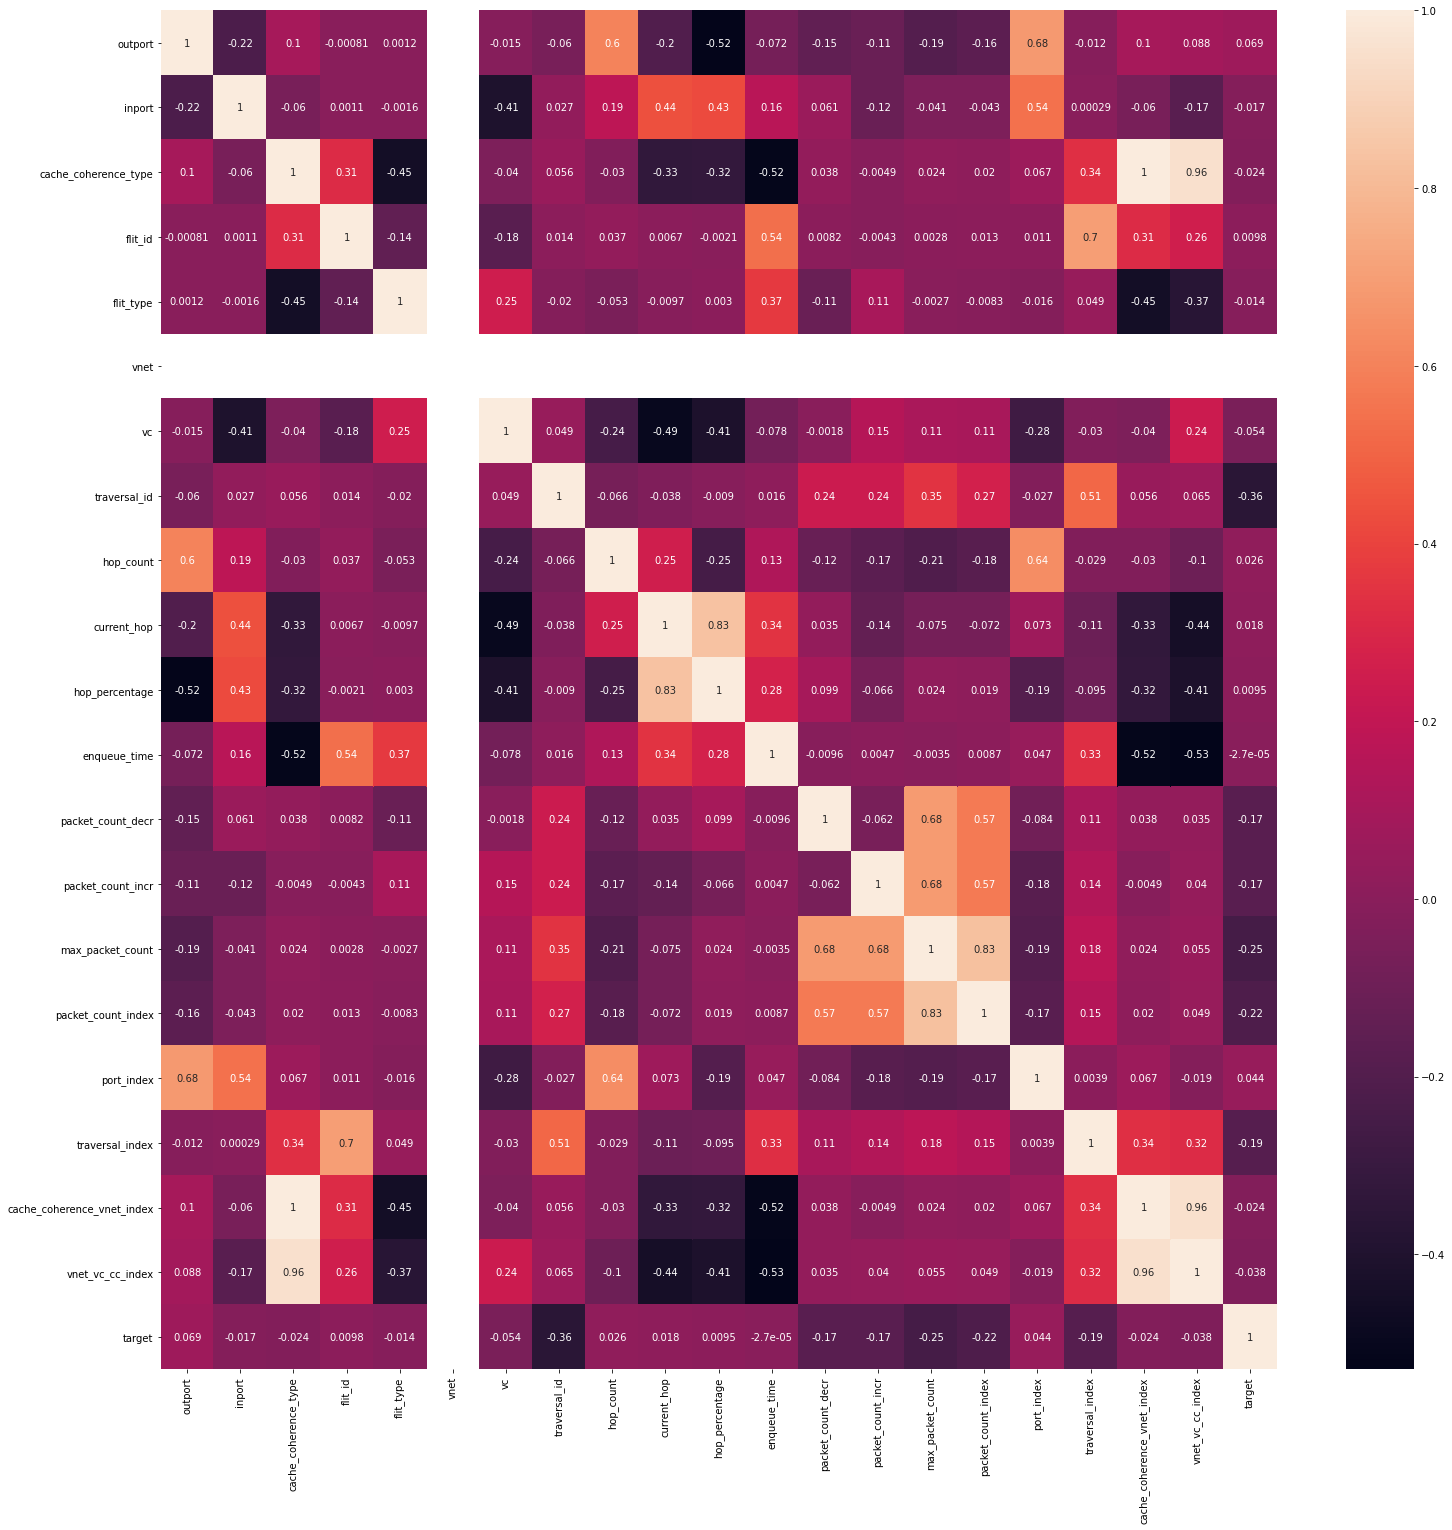

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

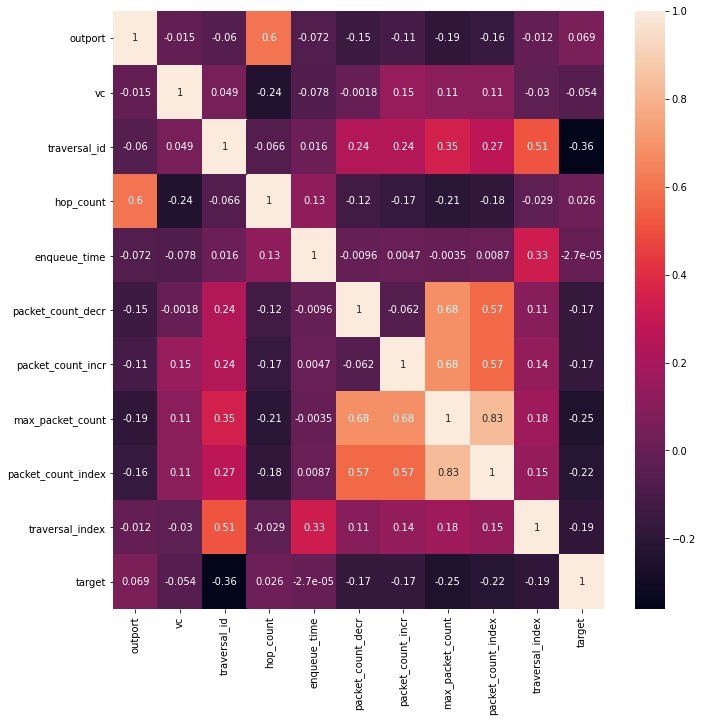

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

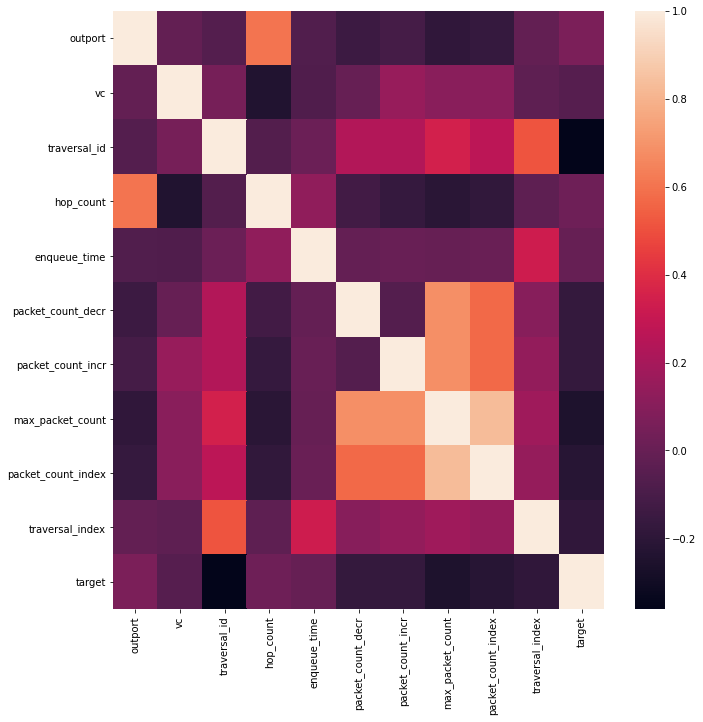

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000000,0.6,0.133333,0.024,0.000,0.024,0.000744,0.000000
1,1.00,0.000000,0.000050,0.6,0.133333,0.024,0.000,0.024,0.000744,0.000002
2,0.75,0.000000,0.000199,0.6,0.133333,0.016,0.008,0.024,0.001240,0.000009
3,0.75,0.000000,0.000349,0.6,0.133333,0.016,0.008,0.024,0.001240,0.000016
4,0.75,0.000000,0.000266,0.8,0.133333,0.008,0.016,0.024,0.001240,0.000012
...,...,...,...,...,...,...,...,...,...,...
82498,0.75,0.000000,0.999983,0.8,0.250000,0.032,0.120,0.152,0.019598,0.222241
82499,0.75,0.000000,0.999983,0.8,0.366667,0.024,0.128,0.152,0.016621,0.333364
82500,0.75,0.000000,0.999983,0.8,0.483333,0.016,0.136,0.152,0.013148,0.444486
82501,0.75,0.000000,0.999983,0.8,0.600000,0.008,0.144,0.152,0.009179,0.833416


In [0]:
train_X[train_X.duplicated()].shape

(0, 10)

In [0]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.8,0.046512,0.074324,0.000000,0.074324,0.001956,0.000000
1,1.00,0.000000,0.000050,0.6,0.093023,0.067568,0.006757,0.074324,0.003734,0.000002
2,0.50,0.000000,0.000232,0.6,0.046512,0.060811,0.013514,0.074324,0.005156,0.000010
3,0.75,0.000000,0.000332,0.6,0.093023,0.054054,0.020270,0.074324,0.006223,0.000015
4,0.50,0.000000,0.000349,0.8,0.046512,0.047297,0.027027,0.074324,0.006935,0.000015
...,...,...,...,...,...,...,...,...,...,...
69803,0.75,0.000000,0.999983,0.8,0.174419,0.027027,0.006757,0.033784,0.001600,0.222241
69804,0.75,0.000000,0.999983,0.8,0.255814,0.020270,0.013514,0.033784,0.001956,0.333364
69805,0.75,0.000000,0.999983,0.8,0.337209,0.013514,0.020270,0.033784,0.001956,0.444487
69806,0.75,0.000000,0.999983,0.8,0.418605,0.006757,0.027027,0.033784,0.001600,0.833416


In [0]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [0]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [0]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [0]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    47001
1    35502
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  976.143072
8  packet_count_index  454.123325
7    max_packet_count  444.649249
9     traversal_index  346.667041
5   packet_count_decr  225.531589
6   packet_count_incr  219.130490
1                  vc   83.988965
0             outport   57.263777
3           hop_count    3.902358
4        enqueue_time    0.194130


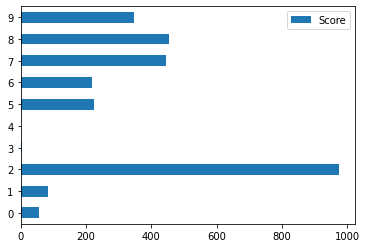

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.74729091665611
Test Prediction Score 95.36839785499154


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 77.44957597983039
Test Prediction Score 77.14880686768237
Test Prediction Score 77.94260947976206
Test Prediction Score 77.89183127749504
Test Prediction Score 75.55028147204817


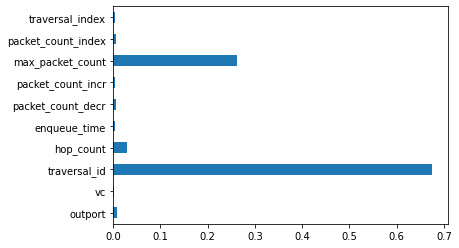

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

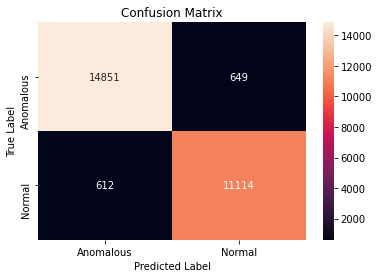

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     15500
           1       0.94      0.95      0.95     11726

    accuracy                           0.95     27226
   macro avg       0.95      0.95      0.95     27226
weighted avg       0.95      0.95      0.95     27226



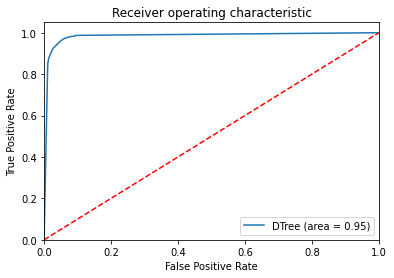

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r13l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99638185863921
Test Prediction Score 99.5996473958716


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 78.67436396974558
Test Prediction Score 80.08117124582988
Test Prediction Score 78.4458309699376
Test Prediction Score 80.03320969550592
Test Prediction Score 76.79628370067003


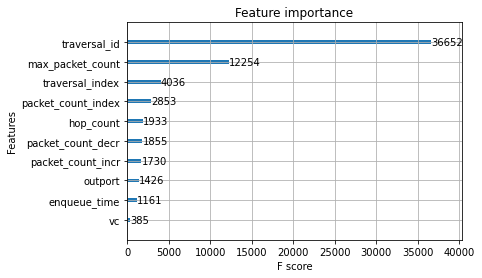

In [0]:
plot_importance(xgbc)
plt.show()

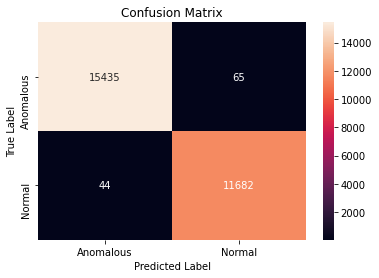

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15500
           1       0.99      1.00      1.00     11726

    accuracy                           1.00     27226
   macro avg       1.00      1.00      1.00     27226
weighted avg       1.00      1.00      1.00     27226



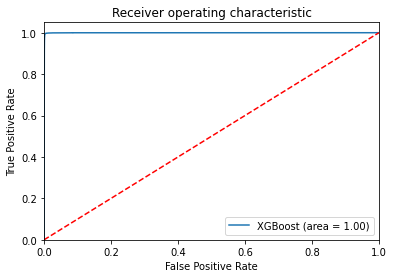

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()